<a href="https://colab.research.google.com/github/KiryuHabib5/Portofolio-Data/blob/main/Submission_Ahmad_Habib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Melakukan Pemeriksaan File
#Dilakukan supaya tidak ada data ganda jika di run ulang dari awal
import os
import shutil
if os.path.exists('/tmp/rockpaperscissors' and '/tmp/__MACOSX'):
  shutil.rmtree('/tmp/rockpaperscissors')
  shutil.rmtree('/tmp/__MACOSX')
  print('berhasil dihapus')
else:
  print('file tidak ada')

berhasil dihapus


In [ ]:
#mendownload file
if os.path.exists('/tmp/rockpaperscissors.zip'): #Jika file zip sudah ada maka tidak perlu mendownload
  print('File Sudah ada')
else:
  !wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip
  print('File Berhasil didownload')

File Sudah ada


In [ ]:
import zipfile as zf

In [ ]:
#Menyiapkan Lokasi
lokasi_kertas = '/tmp/rockpaperscissors/paper'
lokasi_batu = '/tmp/rockpaperscissors/rock'
lokasi_gunting = '/tmp/rockpaperscissors/scissors'
#Untuk Memeriksa sudah ada atau belum, 
#Jika sudah tidak perlu ekstrak

In [ ]:
if os.path.exists(lokasi_kertas and lokasi_gunting and lokasi_batu):
  print('File Sudah Terekstrak Sebelumnya')
else:
  #Ekstrak data 
  lokasi_file_zip = '/tmp/rockpaperscissors.zip'
  ekstrak_file = zf.ZipFile(lokasi_file_zip,mode='r')
  ekstrak_file.extractall('/tmp')
  ekstrak_file.close()
  print('Ekstrak berhasil')

Ekstrak berhasil


In [ ]:
#Membagi data menjadi train set dan validation set
#Dengan Porsi 80% untuk train dan 20% untuk validation

#Membuah Masing masing data menjadi list dan dimasukan ke variabel
kertas = os.listdir(lokasi_kertas)
gunting = os.listdir(lokasi_gunting)
batu = os.listdir(lokasi_batu)

In [ ]:
#membuat fungsi untuk memisahkan data
#Dengan Urutan hasil return : data_train, data_validasi
import random
len(kertas)

712

In [ ]:
def pisah_data(data):

  """Fungsi ini untuk memisahkan data menjadi train set dan validation_set
  dengan urutan hasil return : data_train, data_validasi"""

  panjang_train = int(0.8*len(data))
  panjang_val = int(0.2*len(data))
  selisih =len(data) - (panjang_train + panjang_val)
  print(len(data), " - ( ",panjang_train, " + ", panjang_val," ) = ",selisih)
  if selisih > 0:
    panjang_val +=selisih

  data_train = []
  #memilih data train dari data
  while len(data_train) != panjang_train:
    bantu = random.randint(0, (len(data)-1))
    if data[bantu] not in data_train:
      data_train.append(data[bantu])
      del data[bantu]

  #Sisanya Dicopy kedalam Train
  data_validasi = data.copy()
  del data

  print("Panjang train : ",panjang_train)
  print("Panjang validasi : ",panjang_val,"\n")
  return data_train, data_validasi

In [ ]:
#Mengambil Nilai Masing masing train dan validation label
train_set_kertas, validation_set_kertas = pisah_data(kertas)
train_set_gunting, validation_set_gunting = pisah_data(gunting)
train_set_batu, validation_set_batu = pisah_data(batu)

712  - (  569  +  142  ) =  1
Panjang train :  569
Panjang validasi :  143 

750  - (  600  +  150  ) =  0
Panjang train :  600
Panjang validasi :  150 

726  - (  580  +  145  ) =  1
Panjang train :  580
Panjang validasi :  146 



In [ ]:
#Selanjutnya pindahkan ke folder terpisah

#Membuat fungsi untuk membuat folder penyimpanan dan memindahkan data yang telah dipisahkan kedalam folder tersebut
def memindahkan_data(data_train, data_val, lokasi_data, lokasi_train, lokasi_validasi):
  
  """Fungsi ini untuk membuat folder penyimpanan dan 
  memasukan data yang telah dipisahkan dengan folder tersebut"""

  #Memeriksa apakan folder sudah ada, jika belum maka tambahkan folder
  if not (os.path.exists(lokasi_train) and os.path.exists(lokasi_validasi)):
      os.makedirs(lokasi_train)
      os.makedirs(lokasi_validasi)

  #memindahkan ke folder terpisah
  for i in range(len(data_train)):
      shutil.move(os.path.join(lokasi_data, data_train[i]), os.path.join(lokasi_train, data_train[i]))

  #memindahkan ke folder terpisah
  for i in range(len(data_val)):
      shutil.move(os.path.join(lokasi_data, data_val[i]), os.path.join(lokasi_validasi, data_val[i]))

In [ ]:
#Buat lokasi train dan validation
lokasi_train_set = '/tmp/rockpaperscissors/train'
lokasi_validation_set = '/tmp/rockpaperscissors/validation'

In [ ]:
if os.path.exists(lokasi_train_set and lokasi_validation_set):
  print('Folder Sudah ada')
else:
  memindahkan_data(
    train_set_kertas,
    validation_set_kertas,
    lokasi_kertas,
    os.path.join(lokasi_train_set,'paper'),
    os.path.join(lokasi_validation_set,'paper')
  )
  
  memindahkan_data(
    train_set_batu,
    validation_set_batu,
    lokasi_batu,
    os.path.join(lokasi_train_set,'rock'),
    os.path.join(lokasi_validation_set,'rock')
  )
  
  memindahkan_data(
    train_set_gunting,
    validation_set_gunting,
    lokasi_gunting,
    os.path.join(lokasi_train_set,'scissors'),
    os.path.join(lokasi_validation_set,'scissors')
  )

  #Menghapus folder
  shutil.rmtree(lokasi_kertas)
  shutil.rmtree(lokasi_gunting)
  shutil.rmtree(lokasi_batu)
  print('Berhasil Dipindahkan')

Berhasil Dipindahkan


In [ ]:
os.path.exists('/tmp/rockpaperscissors/paper')

False

In [ ]:
#Mulai Mengklasifikasikan data
import tensorflow as tf

In [ ]:
total_sample_train =  len(os.listdir('/tmp/rockpaperscissors/train/paper')) + \
                      len(os.listdir('/tmp/rockpaperscissors/train/rock')) + \
                      len(os.listdir('/tmp/rockpaperscissors/train/scissors'))

total_sample_validation = len(os.listdir('/tmp/rockpaperscissors/validation/paper')) + \
                          len(os.listdir('/tmp/rockpaperscissors/validation/rock')) + \
                          len(os.listdir('/tmp/rockpaperscissors/validation/scissors'))

In [ ]:
lebar = 200
tinggi = 200
#input_shape
if tf.keras.backend.image_data_format() == 'channels_first': 
    input_shape = (3, lebar, tinggi) 
else: 
    input_shape = (lebar, tinggi, 3) 


In [ ]:
#membuat model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Convolution2D(64, 2, 2))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

In [ ]:
#mengcomplie
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
#Membuat datagen dan untuk train validasi dan test
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range=[0.5,1.0],
    rotation_range = 90,
    horizontal_flip = True,
    fill_mode = 'wrap'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,    
)

In [ ]:
#Membuat generator
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    lokasi_train_set,
    target_size = (lebar,tinggi),
    batch_size = batch_size,
    class_mode = 'categorical',
    seed = 42
)
validation_generator = test_datagen.flow_from_directory(
    lokasi_validation_set,
    target_size = (lebar,tinggi),
    batch_size = batch_size,
    class_mode = 'categorical',
    seed = 42
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
print(total_sample_train//batch_size)
print(total_sample_validation//batch_size)

54
13


In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=total_sample_train//batch_size, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=total_sample_validation//batch_size
)

Epoch 1/10
54/54 [==============================] - 23s 422ms/step - loss: 1.0722 - accuracy: 0.4172 - val_loss: 1.0347 - val_accuracy: 0.4087
Epoch 2/10
54/54 [==============================] - 23s 422ms/step - loss: 0.9243 - accuracy: 0.5743 - val_loss: 0.8436 - val_accuracy: 0.7139
Epoch 3/10
54/54 [==============================] - 23s 433ms/step - loss: 0.7647 - accuracy: 0.6838 - val_loss: 0.8156 - val_accuracy: 0.5913
Epoch 4/10
54/54 [==============================] - 23s 430ms/step - loss: 0.5947 - accuracy: 0.7758 - val_loss: 0.5740 - val_accuracy: 0.7572
Epoch 5/10
54/54 [==============================] - 23s 428ms/step - loss: 0.4621 - accuracy: 0.8375 - val_loss: 0.5969 - val_accuracy: 0.7236
Epoch 6/10
54/54 [==============================] - 23s 431ms/step - loss: 0.4118 - accuracy: 0.8556 - val_loss: 0.4925 - val_accuracy: 0.7885
Epoch 7/10
54/54 [==============================] - 23s 430ms/step - loss: 0.3910 - accuracy: 0.8643 - val_loss: 0.2765 - val_accuracy: 0.9111

In [ ]:
#Melakukan Prediksi
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
label = train_generator.class_indices.keys()
print(label)

dict_keys(['paper', 'rock', 'scissors'])


In [ ]:
label = ['KERTAS','BATU','GUNTING']

In [ ]:
unggahan = files.upload()

Saving batu 1.jpeg to batu 1 (1).jpeg
Saving batu 2.jpeg to batu 2.jpeg
Saving batu 3.png to batu 3.png
Saving batu 4.jpeg to batu 4.jpeg
Saving batu 5.png to batu 5 (4).png
Saving batu 6.png to batu 6 (1).png
Saving Batu 7.jpeg to Batu 7.jpeg
Saving batu 8.jpeg to batu 8.jpeg
Saving batu 9.png to batu 9.png
Saving batu 10.jpeg to batu 10.jpeg
Saving batu 11.png to batu 11.png
Saving batu 12.jpeg to batu 12.jpeg
Saving gunting 1.jpeg to gunting 1.jpeg
Saving gunting 2.png to gunting 2 (1).png
Saving gunting 3.jpeg to gunting 3.jpeg
Saving gunting 4.jpeg to gunting 4 (1).jpeg
Saving gunting 5.png to gunting 5.png
Saving gunting 6.png to gunting 6.png
Saving gunting 7.jpeg to gunting 7.jpeg
Saving gunting 8.jpeg to gunting 8.jpeg
Saving kertas 1.jpeg to kertas 1.jpeg
Saving Kertas 2.jpeg to Kertas 2.jpeg
Saving kertas 3.jpeg to kertas 3 (3).jpeg


In [ ]:
unggahan.keys()

dict_keys(['batu 1.jpeg', 'batu 2.jpeg', 'batu 3.png', 'batu 4.jpeg', 'batu 5.png', 'batu 6.png', 'Batu 7.jpeg', 'batu 8.jpeg', 'batu 9.png', 'batu 10.jpeg', 'batu 11.png', 'batu 12.jpeg', 'gunting 1.jpeg', 'gunting 2.png', 'gunting 3.jpeg', 'gunting 4.jpeg', 'gunting 5.png', 'gunting 6.png', 'gunting 7.jpeg', 'gunting 8.jpeg', 'kertas 1.jpeg', 'Kertas 2.jpeg', 'kertas 3.jpeg'])

batu 1.jpeg


batu 2.jpeg


batu 3.png


batu 4.jpeg


batu 5.png


batu 6.png


Batu 7.jpeg


batu 8.jpeg


batu 9.png


batu 10.jpeg


batu 11.png


batu 12.jpeg


gunting 1.jpeg


gunting 2.png


gunting 3.jpeg


gunting 4.jpeg


gunting 5.png


gunting 6.png


gunting 7.jpeg


gunting 8.jpeg


kertas 1.jpeg


Kertas 2.jpeg


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()




kertas 3.jpeg




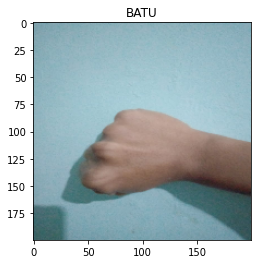

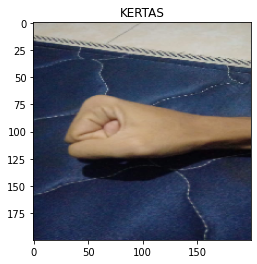

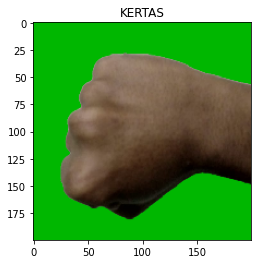

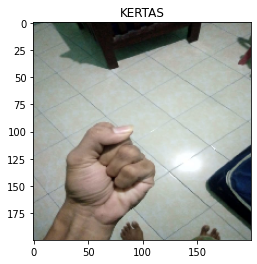

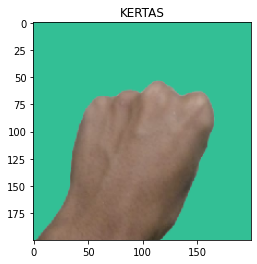

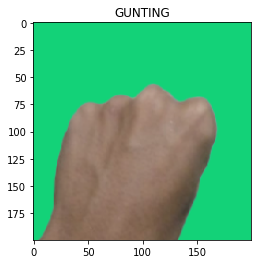

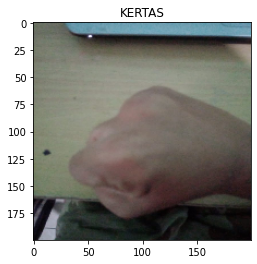

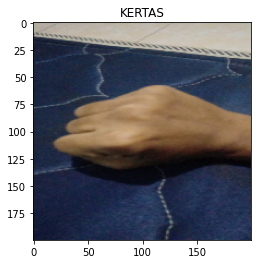

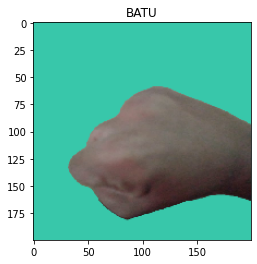

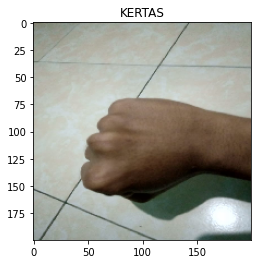

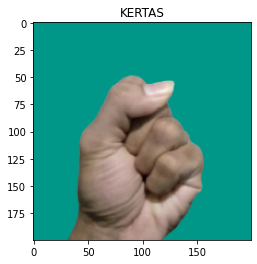

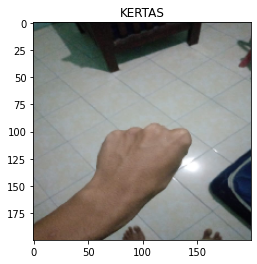

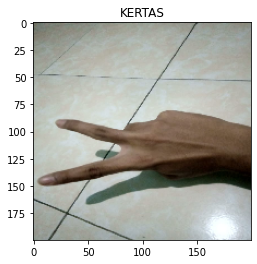

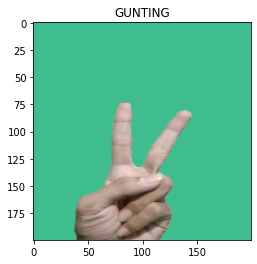

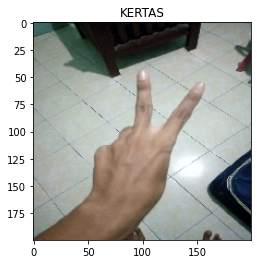

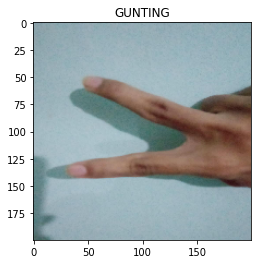

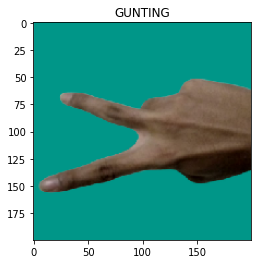

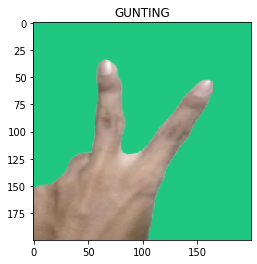

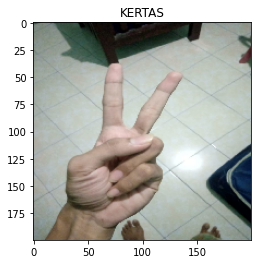

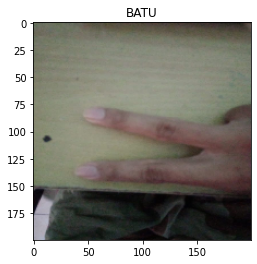

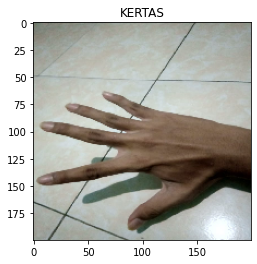

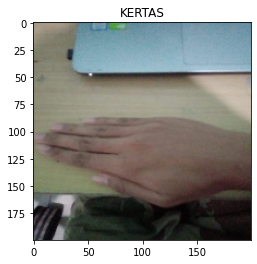

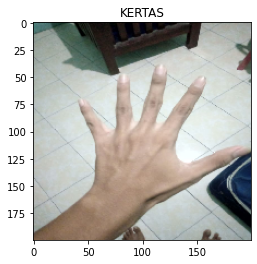

In [ ]:
for i in unggahan.keys():
  print(i)
  gambar = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=(lebar,tinggi))
  x = tf.keras.preprocessing.image.img_to_array(gambar)
  x = np.expand_dims(x, axis=0)
  
  y = np.vstack([x])
  prediksi = model.predict(y, batch_size=10)
  prediksi = np.argmax([prediksi])

  fig, ax = plt.subplots()
  ax = plt.imshow(gambar)
  plt.title(label[prediksi])
  fig.show()
  print('\n')

In [ ]:
#Jika menggunakan foto dari dataset prediksinya hampir selalu benar
#Namun ketika menggunakan Image random hanya sedikit yang benar, 
#image random yang mirip dengan dataset, seperti posisi dan backgorun cenderung prediksinya benar
#Jika Foto memperlihatkan pergelangan tangan,
#Foto tersebut cenderung salah prediksi, baik itu  gunting atau batu dan,
#Hasil prediksinya Kebanyakan 'Kertas'
#Saya tidak mengerti mengapa hal itu bisa terjadi

In [ ]:
#Berikut Link Foto Yang Saya Pakai == > https://drive.google.com/drive/folders/1im3DdkWZcFOdtqL6ZX4aR8G9Ok-AhhrW
#Ada beberapa yang tepat dalam prediksi